In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.metrics import mean_squared_error as MSE

"""
The Dictionary creation part:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
def library(xt, polyn, harmonic):
    if polyn == 0:
        polyn = 1
    
    # The polynomial is (x1 + x2)^p, with p is the order
    # poly order 0
    ind = 0
    n = len(xt[0])
    D = np.ones([n,1])
    
    if polyn >= 1:
        # poly order 1
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(xt[i,:])
            D = np.append(D, new, axis=1)
     
    if polyn >= 2: 
        # ploy order 2
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                ind = ind+1
                new = np.multiply(xt[i,:], xt[j,:])
                new = np.vstack(new)
                D = np.append(D, new, axis=1) 
    
    if polyn >= 3:    
        # ploy order 3
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    ind = ind+1
                    new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                    new = np.vstack(new)
                    D = np.append(D, new, axis=1) 
    
    if polyn >= 4:
        # ploy order 4
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in range(k,len(xt)):
                        ind = ind+1
                        new = np.multiply(np.multiply(xt[i,:], xt[j,:]), xt[k,:])
                        new = np.multiply(new, xt[l,:])
                        new = np.vstack(new)
                        D = np.append(D, new, axis=1) 
    
    if polyn >= 5:
        # ploy order 5
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            ind = ind+1
                            new = np.multiply(xt[i,:], xt[j,:])
                            new = np.multiply(new, xt[k,:])
                            new = np.multiply(new, xt[l,:])
                            new = np.multiply(new, xt[m,:])
                            new = np.vstack(new)
                            D = np.append(D, new, axis=1) 
    
    if polyn >= 6:
        # ploy order 6
        for i in range(len(xt)):
            for j in  range(i,len(xt)):
                for k in  range(j,len(xt)):
                    for l in  range(k,len(xt)):
                        for m in  range(l,len(xt)):
                            for n in  range(m,len(xt)):
                                ind = ind+1
                                new = np.multiply(xt[i,:], xt[j,:])
                                new = np.multiply(new, xt[k,:])
                                new = np.multiply(new, xt[l,:])
                                new = np.multiply(new, xt[m,:])
                                new = np.multiply(new, xt[n,:])
                                new = np.vstack(new)
                                D = np.append(D, new, axis=1) 
    
#     # for the signum or sign operator
#     for i in range(len(xt)):
#         ind = ind+1
#         new = np.vstack(np.sign(xt[i,:]))+0.0001
#         D = np.append(D, new, axis=1)
    
    # for the modulus operator
    for i in range(len(xt)):
        ind = ind+1
        new = np.vstack(abs(xt[i,:]))
        D = np.append(D, new, axis=1)
      
    # for the tensor operator
    for i in range(len(xt)):
        for j in  range(len(xt)):
            ind = ind+1
            new = np.multiply(xt[i,:],abs(xt[j,:]))
            new = np.vstack(new)
            D = np.append(D, new, axis=1)
            
    if harmonic == 1:
        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.sin(xt[i,:]))
            D = np.append(D, new, axis=1)

        for i in range(len(xt)):
            ind = ind+1
            new = np.vstack(np.cos(xt[i,:]))
            D = np.append(D, new, axis=1)
            
    ind = len(D[0])
    
    return D, ind

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
A MDOF system excited by random noise
----------------------------------------------------------------------
"""

def drift_mat(dof,k,c,m):
    dim = 2 * dof
    A = np.zeros((dim,dim))
    
    for i in range(dim):
        if (i%2 == 0):
            A[i][i+1] = 1
    
        elif(i==1):
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    
        elif(i==dim-1):
            A[i][i] = -c/m
            A[i][i-1] = -k/m
            A[i][i-2] = c/m
            A[i][i-3] = k/m
            
        else:
            A[i][i-3] = k/m 
            A[i][i-2] = c/m
            A[i][i-1] = -(k+k)/m
            A[i][i] = -(c+c)/m
            A[i][i+1] = k/m
            A[i][i+2] = c/m
    return A

def M_DOF_sys(x_initial, dof, T):
    # parameters of M_DOF_sys in Equation
    m = 1
    c = 2
    k = 3000
    sigma = 0.5
    
    # solution by euler maruyama
    # -------------------------------------------------------
    dt = 0.0005
    t = np.arange(0, T+dt, dt)
    Nsamp = 500 # no. of samples in the run
    
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    y6 = []
    xz1 = []
    xz2 = []
    xz3 = []
    xzs11 = []
    xzs22 = []
    xzs33 = []
    
    # Simulation Starts Here ::
    # -------------------------------------------------------
    for ensemble in range(Nsamp):
        x0 = x_initial
        x = x0                              # initial condition.
        if ensemble%50==0:
            print(ensemble)
        for n in range(len(t)-1):
            dW = np.sqrt(dt)*np.random.randn(2*dof)
            
            '''LINEAR PART DRIFT'''
        
            A = drift_mat(dof,k,c,m)
            
            '''DIFFUSION TERM  = b'''
            diffu_arr = np.zeros(2*dof)
            for i in range(2*dof):
                if (i%2 != 0):
                    diffu_arr[i] = sigma/m
            
            soln_arr = x0 + np.matmul(A,x0)*dt + diffu_arr*dW        
            x0 = soln_arr
            x = np.column_stack((x, x0))
            
  
        y1.append(x[-1,:])     # Displacement
        y2.append(x[-2,:])      
        y3.append(x[-3,:])     # Displacement
        y4.append(x[-4,:])
        y5.append(x[-5,:])
        y6.append(x[-6,:])
        

        zint1 = x[-1,0:-1]
        xfinal1 = x[-1,1:] 
        xmz1 = (xfinal1 - zint1)
        
        zint2 = x[-3, 0:-1]
        xfinal2 = x[-3, 1:] 
        xmz2 = (xfinal2 - zint2) 
        
        zint3 = x[-5, 0:-1]
        xfinal3 = x[-5, 1:] 
        xmz3 = (xfinal3 - zint3) 
        
        xz1.append(xmz1)
        xz2.append(xmz2)
        xz3.append(xmz3)
        
        xmzsq11 = np.multiply(xmz1, xmz1)
        xzs11.append(xmzsq11)
        
        xmzsq22 = np.multiply(xmz2, xmz2)
        xzs22.append(xmzsq22)
        
        xmzsq33 = np.multiply(xmz3, xmz3)
        xzs33.append(xmzsq33)
        
    xz1 = pow(dt,-1)*np.mean(np.array(xz1), axis = 0)
    xz2 = pow(dt,-1)*np.mean(np.array(xz2), axis = 0)
    xz3 = pow(dt,-1)*np.mean(np.array(xz3), axis = 0)

    xzs11 = pow(dt,-1)*np.mean(np.array(xzs11), axis = 0)
    xzs22 = pow(dt,-1)*np.mean(np.array(xzs22), axis = 0)
    xzs33 = pow(dt,-1)*np.mean(np.array(xzs33), axis = 0) 

    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)
    y5 = np.array(y5)
    y6 = np.array(y6)

    time = t[0:-1]
    return xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time

In [3]:
T = 1
dof = 21
x_initial = np.zeros(2*dof)
# x_initial[0]=0.0001
# x_initial[2]=9.800000000000001e-05
# x_initial[4]=9.600000000000002e-05
# x_initial[6]=9.400000000000002e-05
# x_initial[8]=9.200000000000003e-05
# x_initial[10]=9.000000000000003e-05
# x_initial[12]=8.800000000000004e-05
# x_initial[14]=8.600000000000004e-05
# x_initial[16]=8.400000000000005e-05
# x_initial[18]=8.200000000000006e-05
# x_initial[20]=8.000000000000006e-05
# x_initial[22]=7.800000000000007e-05
# x_initial[24]=7.600000000000007e-05
# x_initial[26]=7.400000000000008e-05
# x_initial[28]=7.200000000000008e-05
# x_initial[30]=7.000000000000009e-05
# x_initial[32]=6.80000000000001e-05
# x_initial[34]=6.60000000000001e-05
# x_initial[36]=6.40000000000001e-05
# x_initial[38]=6.200000000000011e-05

In [4]:
# p = 0.0001
# for i in range(40):
#     if i%2==0:
#         print(f'x_initial{[i]}={0}')
#         p = p - 0.000002

In [5]:
import time
start = time.time()
xz1, xz2, xz3, xzs11, xzs22, xzs33, y1, y2, y3, y4, y5, y6, time_ = M_DOF_sys(x_initial, dof, T)
end = time.time()
print()
TIMES = (end - start)/60
TIMES

0
50
100
150
200
250
300
350
400
450



1.2270350535710652

In [6]:
# print((time2-time1)/60, 'MIN')

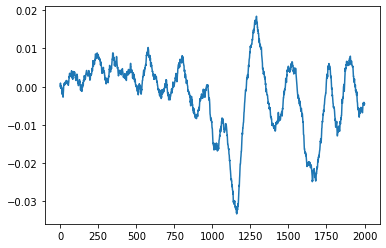

In [7]:
plt.plot(np.mean(y1, axis=0))

In [8]:
import time
startD = time.time()

# Expected Dictionary Creation:
libr = []
for j in range(len(y1)):
    data = np.row_stack((y1[j,0:-1], y2[j,0:-1], y3[j,0:-1], y4[j,0:-1], y5[j,0:-1], y6[j,0:-1]))
    Dtemp, nl = library(data, 1, 0)
    libr.append(Dtemp)
libr = np.array(libr)
Dictionary= np.mean(libr, axis = 0)


endD = time.time()
TIMED = (endD - startD)/60
TIMED

1.6517994721730551

In [36]:
TIMES+TIMED

2.8788345257441206

In [9]:
xdts = xzs11
D = Dictionary

In [10]:
D.shape, xdts.shape

((2000, 49), (2000,))

In [11]:
Dict = D.reshape(-1,order='F')
Dict.shape

(98000,)

In [12]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[7.0],[9.0],[14.0],[18.0],[20.0],[22.0],[24.0],[26.0],[28.0],[29.0],[30.0],[32.0],[33.0],[39.0],[40.0],[49.0]]), 'Value': matlab.double([[0.25081226642466276],[-1.937893215743601],[4.477844534153285],[-0.28145007080821555],[0.35851552580441354],[47.55250381624561],[-3.206638970792857],[-4.996083011451916],[-0.2749240604746932],[0.7492562055091906],[-2.105407217006457],[-0.4353861240071634],[-59.86092868146889],[-268.7726889226767],[7.0434376546113295],[-0.4796669506858283],[277.7817098724699]])}


In [13]:
print(np.sqrt(abs(DMOut['Value'][0][0])))

0.5008116077175755


In [14]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1.]


In [15]:
import warnings
import math
import numpy as np
import scipy as sp
import sympy as smp
from scipy import stats
from numpy import linalg as la
import matplotlib.pyplot as plt
from numpy.random import gamma
from scipy.special import loggamma

def Variational_Bayes_Code(X, y, initz0, tol, verbosity):

    if (len(X) == 0 or len(y) == 0):
        raise Exception('X and or y is missing')
        
    if (len(X) != len(y)):
        raise Exception('Number of observations do not match')
        
    # X = stats.zscore(X, ddof = 1)         
    # X = np.c_[np.ones(len(X)),X]
    # X = np.c_[np.ones(len(X)),X]          
    # y = y - np.mean(y)
    N = len(X)
    # Prior parameters of noise variance (Inverse Gamma dist)
    A = 1e-4
    B = 1e-4
    vs = 10
    tau0 = 1000
    
    if (len(initz0) == 0):
        raise Exception('No initial value of z found')
    else:
        p0 = expit(-0.5*(np.sqrt(N)))       
        
        # Adding the intercept indicator variable (slightly less than 1 to prevent log(0) values) 
        # initz = np.hstack((1,initz0))  
        initz = initz0

        DS,LLcvg  = run_VB2(X, y, vs, A, B, tau0, p0, initz, tol, verbosity)    
        # This is function which will come first
        
    out_vb   = DS
    a = DS['zmean'] > 0.5
    count = 0
    modelIdx = []
    for i in a:
        if i == True:
            modelIdx.append(count)
        count += 1
            
    modelIdx = np.setdiff1d(modelIdx,0)
    out_vb['modelIdx'] = modelIdx-1
    out_vb['Zmed'] = DS['zmean'][modelIdx]
    out_vb['Wsel'] = DS['wmean'][modelIdx]
    out_vb['Wcov'] = DS['wCOV'][modelIdx, modelIdx]
    out_vb['sig2'] = DS['sig2']
    
    return out_vb

DS = {}
def run_VB2(Xc, yc, vs, A, B, tau0, p0, initz, tol, verbosity):
    """This function is the implementation of VB from John T. Ormerod paper (2014)
       This implementation uses slab scaling by noise variance
       vs    : treated as a constant
       A,B   : constants of the IG prior over noise variance
       tau0  : Expected value of (sigma^{-2})
       p0    : inclusion probablility
       initz : Initial value of z
       Xc    : Centered and standardized dictionary except the first column
       yc    : Centered observations """
    
    Lambda    = logit(p0)
    iter_     = 0
    max_iter  = 100
    LL        = np.zeros(max_iter)        
    zm        = np.reshape(initz,(-1))            
    taum      = tau0                      
    invVs     = 1/vs
    
    X = Xc
    y = yc
    XtX = (X.T) @ X
    XtX = 0.5*(XtX + (XtX).T)
    Xty = (X.T) @ y                 
    yty = (y.T) @ y

    eyep = np.eye(len(XtX))
    [N,p] = X.shape
    allidx = np.arange(p)
    zm[0] = 1                                                                   # Always include the intercept 
    Abar    = (A + 0.5*N + 0.5*p)
    converged = 0
    
    while (converged==0):
        if (iter_==100):
            break
        
        Zm       = np.diag(zm)
        Omg      = (np.reshape(zm,(-1,1)) @ np.reshape(zm,(1,-1))) + (Zm @ (eyep-Zm))
        # Update the mean and covariance of the coefficients given mean of z
        term1    = XtX * Omg                                                       # elementwisw multiplication
        invSigma = taum * (term1 + invVs * eyep)
        invSigma = 0.5*(invSigma + invSigma.T)                                     # symmetric
        Sigma    = la.inv(invSigma) @ eyep
        mu       = taum * (Sigma @ Zm @ Xty)                                       # @ ---> matrix multiplication
        
        # Update tau related to sigma
        term2    = 2 * Xty @ Zm @ mu
        term3    =  np.reshape(mu,(len(initz0),1)) @ np.reshape(mu,(1,len(initz0)))+ Sigma
        term4    = yty - term2 + np.trace((term1 + invVs * eyep) @ term3)    
        s        = B + 0.5*term4
        
        if s<0:
            warnings.warn('s turned out be less than 0. Taking absolute value')
            s = B + 0.5*abs(term4)
        
        taum     = Abar / s
        zstr   = zm

        order   = np.setdiff1d(np.random.permutation(p), 0, assume_unique=True)
        for j in order: 
            muj     = mu[j]                            
            sigmaj  = Sigma[j,j]
            
            remidx  = np.setdiff1d(allidx,j)
            mu_j    = mu[remidx]
            Sigma_jj= Sigma[remidx,j]
            etaj    = (Lambda - 0.5 * taum * ((muj**2 + sigmaj) * XtX[j,j]) 
                       + taum * np.reshape(X[:,j],(1,-1)) @ (np.reshape(y,(-1,1))*muj 
                        -X[:,remidx] @ np.diag(zstr[remidx]) @ ((mu_j * muj + Sigma_jj).reshape(-1,1))))
            zstr[j] = expit(etaj)
            
        zm = zstr
        
        # Calculate marginal log-likelihood
        
        LL[iter_] = ( 0.5*p 
                    - 0.5*N*np.log(2*np.pi) 
                    + 0.5*p*np.log(invVs) 
                    + A*np.log(B)
                    - loggamma(A)
                    + loggamma(Abar) 
                    - Abar*np.log(s)
                    + 0.5*np.log(la.det(Sigma))
                    + np.nansum(zm*(np.log(p0) - np.log(zm))) 
                    + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
        
        if(verbosity):
            print(f'Iteration = {iter_}  log(Likelihood) = {LL[iter_]}')
        
        if(iter_>1):
            cvg = LL[iter_] - LL[iter_-1]
            
            if (cvg < 0 and verbosity):
                print('OOPS!  log(like) decreasing!!')
            elif (cvg<tol or iter_> max_iter):
                converged = 1
                LL = LL[0:iter_]
                
        iter_    = iter_ + 1
    DS['zmean'] = zm
    DS['wmean'] = mu
    DS['wCOV'] = Sigma
    DS['sig2'] = 1/taum
    LLcvg    = LL[-1]
    return DS, LLcvg
    
def logit(C):
    logitC = np.log(C) - np.log(1-C)
    return logitC

def expit(C):
    expitC = 1./(1 + np.exp(-C))
    return expitC

In [16]:
tol = 0.0001
verbosity = True
initz0 = initz0
DS = Variational_Bayes_Code(D, xdts, initz0, tol, verbosity)

print(DS) 

Iteration = 0  log(Likelihood) = 3925.4578337138
Iteration = 1  log(Likelihood) = 3919.9652522512843
Iteration = 2  log(Likelihood) = 3912.2548330214645
OOPS!  log(like) decreasing!!
Iteration = 3  log(Likelihood) = 3912.2509937148534
OOPS!  log(like) decreasing!!
Iteration = 4  log(Likelihood) = 3912.2509942877364
{'zmean': array([1.00000000e+000, 7.76052000e-011, 1.92050896e-010, 8.66665039e-011,
       1.92165153e-010, 8.33387981e-011, 1.92231534e-010, 1.54385034e-163,
       1.00000000e+000, 1.13260091e-143, 1.34544222e-011, 1.13251178e-143,
       1.54171250e-011, 1.65048617e-010, 1.94384054e-010, 1.82371441e-010,
       1.94386353e-010, 1.86082215e-010, 1.94391692e-010, 1.94270860e-010,
       1.94479039e-010, 1.94337377e-010, 1.94479330e-010, 1.94329035e-010,
       1.94479562e-010, 1.82474203e-010, 1.94426884e-010, 1.68709446e-010,
       1.94429165e-010, 1.83812095e-010, 1.94426806e-010, 1.94274109e-010,
       1.94479331e-010, 1.94331470e-010, 1.94479416e-010, 1.94331795e-010

C:\Users\USER\AppData\Local\Temp/ipykernel_1684/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1684/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


In [17]:
DS['wmean']

array([ 2.82801238e-001, -1.01286184e-010, -6.72648769e-011,
       -9.70372241e-011, -6.61249969e-011, -1.16642977e-010,
       -6.47664086e-011,  3.62540044e-162,  2.51681958e+000,
        2.28019398e-142,  3.32978316e-011,  2.24795248e-142,
        3.73297619e-011, -9.42445660e-011, -1.66706983e-012,
       -3.19394933e-011, -2.05414868e-012, -2.13142092e-011,
       -1.81544234e-012, -1.78455935e-011, -2.27397062e-012,
       -1.49922795e-011, -2.15664544e-012, -1.54167836e-011,
       -2.04385344e-012, -4.92435878e-011, -3.70318091e-013,
       -4.87119759e-011, -6.48079494e-013, -6.66681337e-011,
       -1.01051267e-012, -1.79161146e-011, -2.15851214e-012,
       -1.50402091e-011, -2.11275975e-012, -1.50638066e-011,
       -2.00687611e-012, -3.26962034e-011, -3.93642348e-013,
       -5.57389438e-011, -5.84901357e-013, -1.05172309e-010,
       -1.12052753e-012, -1.74367289e-011, -2.04173098e-012,
       -1.52144291e-011, -2.00552110e-012, -1.53497844e-011,
       -1.96038203e-012]

In [18]:
np.sqrt(abs(DS['wmean'][0]))

0.5317905960100857

<StemContainer object of 3 artists>

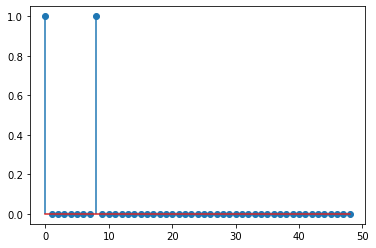

In [19]:
plt.stem(DS['zmean'])   

In [35]:
# 0.5*0.63

0.315

In [20]:
xdts = xzs22

In [21]:
#!/usr/bin/env python
"""
Sample script that uses the SparseBayes module created using
MATLAB Compiler SDK.

Refer to the MATLAB Compiler SDK documentation for more information.
"""

from __future__ import print_function
import SparseBayes
import matlab

my_SparseBayes = SparseBayes.initialize()

DictIn = matlab.double(Dict, size=(D.shape[0], D.shape[1]))
targetIn = matlab.double(xdts, size=(D.shape[0], 1))
DMOut = my_SparseBayes.SparseBayes(DictIn, targetIn)
print(DMOut, sep='\n')

my_SparseBayes.terminate()

{'Relevant': matlab.double([[1.0],[3.0],[6.0],[9.0],[12.0],[18.0],[20.0],[24.0],[26.0],[27.0],[31.0],[32.0],[35.0],[42.0],[44.0]]), 'Value': matlab.double([[0.24676712632665385],[-6.141139190204649],[0.023652942000688112],[6.261527847748281],[0.17862265703596722],[0.4503652513314896],[29.345179316515548],[-16.699940975107218],[0.8835387052772024],[18.04003981798308],[-30.392038479919446],[-70.3205819451273],[69.17900421714059],[0.4206758197566445],[37.550957975551604]])}


In [22]:
print(abs(DMOut['Value'][0][0]))

0.24676712632665385


In [23]:
c = np.array(DMOut['Value'])
d = []
for j in c:
    d.append(j[0])
    
a = np.array(DMOut['Relevant'])
b = []
for i in a:
    b.append(int((i[0])-1))
    
initz0 = np.zeros(D.shape[1])
for i in b:
    initz0[i] = 1
    
print(initz0)

[1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0.]


In [26]:
X = D
y = xdts
initz0 = initz0
tol = 0.0001
verbosity = True
DS = Variational_Bayes_Code(X, y, initz0, tol, verbosity)
print(DS)

Iteration = 0  log(Likelihood) = 4298.142718807413
Iteration = 1  log(Likelihood) = 4299.4590678679015
Iteration = 2  log(Likelihood) = 4299.460001773051
Iteration = 3  log(Likelihood) = 4299.460002310193
{'zmean': array([1.00000000e+000, 7.76044820e-011, 1.92050871e-010, 8.66657985e-011,
       1.92165129e-010, 8.33380865e-011, 1.92231512e-010, 1.53838486e-163,
       1.00000000e+000, 1.12911078e-143, 1.34540606e-011, 1.00000000e+000,
       1.54167318e-011, 1.65048344e-010, 1.94384053e-010, 1.82371323e-010,
       1.94386352e-010, 1.86082132e-010, 1.94391691e-010, 1.94270858e-010,
       1.94479039e-010, 1.94337376e-010, 1.94479330e-010, 1.94329033e-010,
       1.94479562e-010, 1.82474086e-010, 1.94426883e-010, 1.68709205e-010,
       1.94429165e-010, 1.83811990e-010, 1.94426806e-010, 1.94274107e-010,
       1.94479331e-010, 1.94331468e-010, 1.94479416e-010, 1.94331794e-010,
       1.94479641e-010, 1.84018211e-010, 1.94394178e-010, 1.86753772e-010,
       1.94394262e-010, 1.67804158e

C:\Users\USER\AppData\Local\Temp/ipykernel_1684/3512855728.py:147: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
C:\Users\USER\AppData\Local\Temp/ipykernel_1684/3512855728.py:147: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


0.4384515192498982

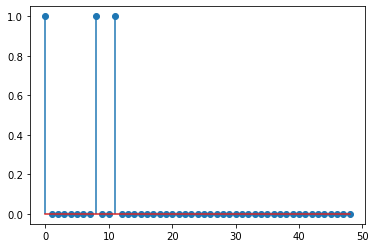

In [27]:
plt.stem(DS['zmean'])   
np.sqrt(DS['wmean'][0])